In [13]:
import os
import pathlib
import random
import warnings
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

warnings.filterwarnings("ignore")

In [14]:
dataset='data/vegetable-image-dataset'

train_folder = os.path.join(dataset,"train")
validation_folder = os.path.join(dataset,"validation")
test_folder = os.path.join(dataset,"test")

In [15]:
def count_files(rootdir):
    
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(test_folder))

There are 200 files in Capsicum
There are 200 files in Radish
There are 200 files in Pumpkin
There are 200 files in Cauliflower
There are 200 files in Potato
There are 200 files in Bean
There are 200 files in Cucumber
There are 200 files in Brinjal
There are 200 files in Cabbage
There are 200 files in Broccoli
There are 200 files in Bitter_Gourd
There are 200 files in Papaya
There are 200 files in Bottle_Gourd
There are 200 files in Tomato
There are 200 files in Carrot


In [28]:
IMAGE_SIZE = [150, 150]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(15, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (150, 150),
    batch_size = 64, 
    class_mode = 'categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [34]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
235/235 [==============================] - 121s 516ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 2/10
235/235 [==============================] - 106s 450ms/step - loss: 0.0556 - accuracy: 0.9809 - val_loss: 0.0288 - val_accuracy: 0.9923
Epoch 3/10
235/235 [==============================] - 107s 456ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0481 - val_accuracy: 0.9847
Epoch 4/10
235/235 [==============================] - 105s 446ms/step - loss: 0.0577 - accuracy: 0.9804 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 5/10
235/235 [==============================] - 107s 456ms/step - loss: 0.0546 - accuracy: 0.9818 - val_loss: 0.0306 - val_accuracy: 0.9917
Epoch 6/10
235/235 [==============================] - 111s 471ms/step - loss: 0.0479 - accuracy: 0.9837 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 7/10
235/235 [==============================] - 110s 467ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0319 -

In [35]:
validation_data_dir = 'data/vegetable-image-dataset/test'

validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.
Test Accuracy: 0.989


In [36]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in validation_generator.class_indices.items()])

print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


1/1 [==============================] - 0s 116ms/step


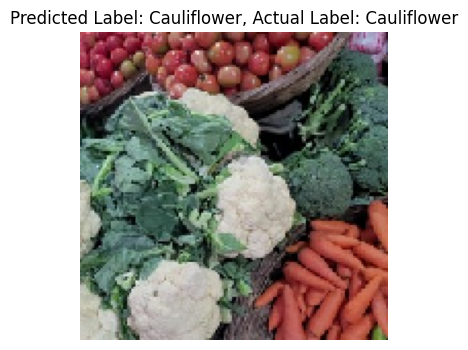

In [38]:
test_image_cat = os.listdir('data/vegetable-image-dataset/test')
random_test_image_cat = random.choice(test_image_cat)
test_image_file = os.listdir('data/vegetable-image-dataset/test/'+random_test_image_cat)
random_number_image_cat = random.choice(test_image_file)

# test_image_path = 'data/vegetable-image-dataset/test/'+ random_test_image_cat +'/'+ random_number_image_cat
test_image_path = 'data/vegetable-image-dataset/test/cauliflower/1100.jpg'


def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
# generate_predictions(test_image_path, actual_label=random_test_image_cat)
generate_predictions(test_image_path, actual_label='Cauliflower')